<a href="https://colab.research.google.com/github/brighamfrandsen/econ484/blob/master/examples/biasvariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bias-Variance Tradeoff
This notebook demonstrates the bias-variance tradeoff in a least squares setting

We'll generate datasets of $n$ observations, with each observation generated by the following:
$$Y_i=\sin(7x_i)\exp(-x_i^2)+\varepsilon_i,$$
where $\varepsilon_i\sim N(0,\sigma^2)$ and $x_i\sim U(-1,1)$. We will approximate the function with a polynomial series

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define the true CEF:
def generate_expy(x):
  expy=np.sin(3*x)*np.exp(-x**2)
  return expy

# generate the data, including a grid for plotting
def generate_vectors(n):
    sigma = .5
    epsilon = np.random.normal(loc=0, scale=sigma, size=(n, 1))  # Normal(0,1) variables
    x = np.random.uniform(low=-1, high=1, size=(n, 1))  # Uniform(-1,1) variables
    xgrid=np.arange(-1, 1.001, 0.001).reshape(-1, 1)
    expygrid = generate_expy(xgrid)
    y = generate_expy(x)+epsilon
    ygrid = expygrid + np.random.normal(loc=0, scale=sigma, size=(xgrid.shape[0], 1))
    return epsilon, x,y,xgrid,expygrid,ygrid

In [3]:
# want to try some stuff
n=10
epsilon, x,y,xgrid,expygrid,ygrid=generate_vectors(n)
ngrid = xgrid.shape[0]


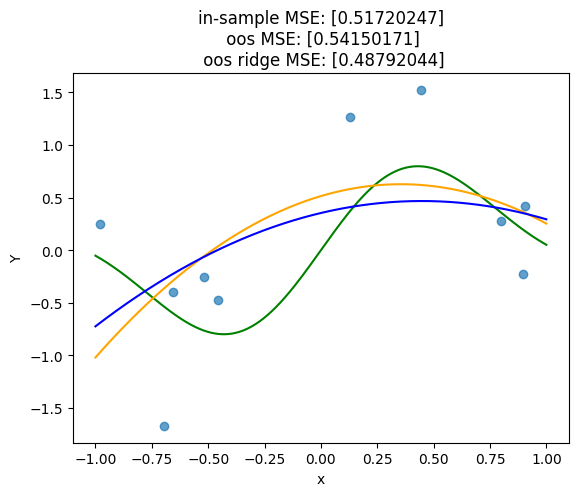

In [ ]:
powerlist=[nlsy['educ']**j for j in np.arange(1,13)]
X=pd.concat(powerlist,axis=1)
X.columns = ['educ'+str(j) for j in np.arange(1,13)]
# standardize our X matrix (doesn't matter for OLS, but will matter for lasso below)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# run least squares regression
# instantiate and fit our regression object:
reg=linear_model.LinearRegression().fit(X_scaled,nlsy['lnw_2016'])
# generate predicted values
yhat=reg.predict(X_scaled)

# try ridge
ridge=Ridge(alpha =1)
ridge.fit(xpoly,y)
yhatridge = ridge.predict(xpoly)
yhatgridridge=ridge.predict(xgridpoly)

MSEinsample=sum((y-yhat)**2)/n
MSEridgeinsample=sum((y-yhatridge)**2)/n
MSEoos=sum((ygrid - yhatgrid)**2)/ngrid
MSEridgeoos=sum((ygrid - yhatgridridge.reshape(-1,1))**2)/ngrid
plt.scatter(x, y, alpha=0.7)
plt.plot(xgrid,expygrid,color='green')
plt.plot(xgrid,yhatgrid,color='orange')
plt.plot(xgrid,yhatgridridge,color='blue')
plt.xlabel("x")
plt.ylabel("Y")
plt.title(f"in-sample MSE: {MSEinsample}\n oos MSE: {MSEoos}\n oos ridge MSE: {MSEridgeoos}")

plt.show()

In [ ]:
yhatgridridge.reshape(-1,1)

array([[-1.40657602],
       [-1.3461431 ],
       [-1.28948911],
       ...,
       [ 0.38596812],
       [ 0.40564151],
       [ 0.42749701]])